Loading dataset...
Dataset loaded successfully.
Iteration 1, loss = 0.07456244
Iteration 2, loss = 0.02320659
Iteration 3, loss = 0.01251301
Iteration 4, loss = 0.00838903
Iteration 5, loss = 0.00628184
Iteration 6, loss = 0.00496415
Iteration 7, loss = 0.00414454
Iteration 8, loss = 0.00347112
Iteration 9, loss = 0.00312284
Iteration 10, loss = 0.00274346
Iteration 11, loss = 0.00254519
Iteration 12, loss = 0.00225439
Iteration 13, loss = 0.00211137
Iteration 14, loss = 0.00198477
Iteration 15, loss = 0.00182458
Iteration 16, loss = 0.00168285
Iteration 17, loss = 0.00158329
Iteration 18, loss = 0.00149917
Iteration 19, loss = 0.00151279
Iteration 20, loss = 0.00137905
Iteration 21, loss = 0.00148927
Iteration 22, loss = 0.00118788
Iteration 23, loss = 0.00124958
Iteration 24, loss = 0.00121139
Iteration 25, loss = 0.00106219
Iteration 26, loss = 0.00110381
Iteration 27, loss = 0.00103569
Iteration 28, loss = 0.00115956
Iteration 29, loss = 0.00096169
Iteration 30, loss = 0.00095414
I

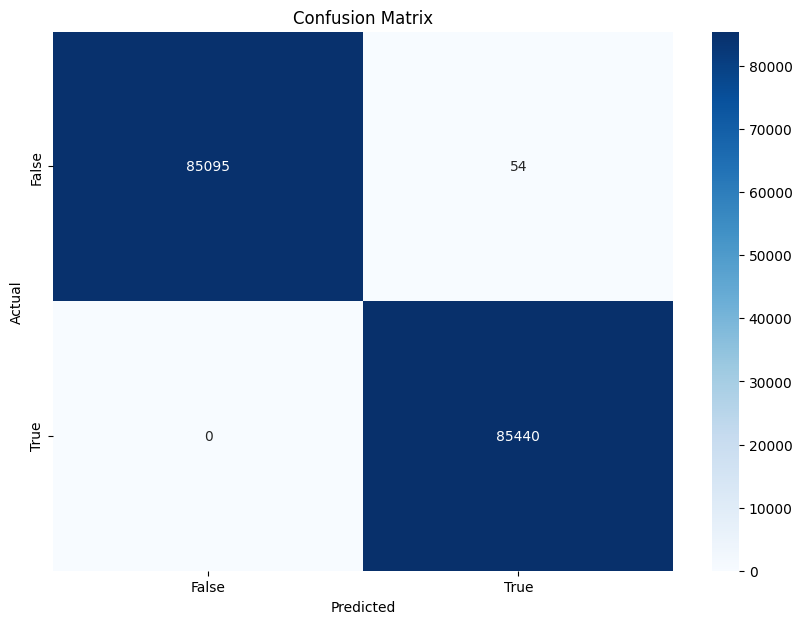

Number of epochs completed: 36


['scaler.pkl']

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'./creditcard_2023.csv'
print("Loading dataset...")
data = pd.read_csv(file_path)
print("Dataset loaded successfully.")

# Split the data into features and target
X = data.drop(columns=['id', 'Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Use all available CPU cores for training
os.environ['OMP_NUM_THREADS'] = str(os.cpu_count())
os.environ['MKL_NUM_THREADS'] = str(os.cpu_count())
os.environ['NUMEXPR_NUM_THREADS'] = str(os.cpu_count())
os.environ['VECLIB_MAXIMUM_THREADS'] = str(os.cpu_count())
os.environ['OPENBLAS_NUM_THREADS'] = str(os.cpu_count())

# Define the MLP model with verbose enabled to track progress
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42, n_iter_no_change=10, verbose=2)

# Train the MLP model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the number of epochs completed
print(f"Number of epochs completed: {mlp.n_iter_}")

# Save the trained model and the scaler
joblib.dump(mlp, '1-mlp_fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')